In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('husl')

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

{'bodies': [<matplotlib.collections.PolyCollection at 0x236812d9c10>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x236812d9b80>,
 'cmins': <matplotlib.collections.LineCollection at 0x236812fdb20>,
 'cbars': <matplotlib.collections.LineCollection at 0x236812fd370>}

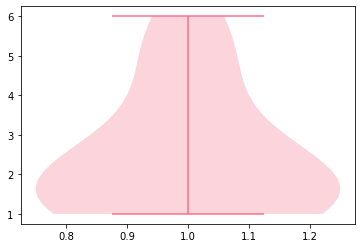

In [9]:
plt.violinplot([1,1,2,2,1,1,2,2,3,4,5,6])

In [2]:
df=pd.read_csv('iris.csv')

In [3]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [5]:
df["label"]=le.fit_transform(df["Species"])

In [6]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,label
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


Data Visualization
After graphing the features in a pair plot, it is clear that the relationship between pairs of features of a iris-setosa (in pink) is distinctly different from those of the other two species.
There is some overlap in the pairwise relationships of the other two species, iris-versicolor (brown) and iris-virginica (green).

C:\Users\Pooja\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Pooja\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Pooja\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


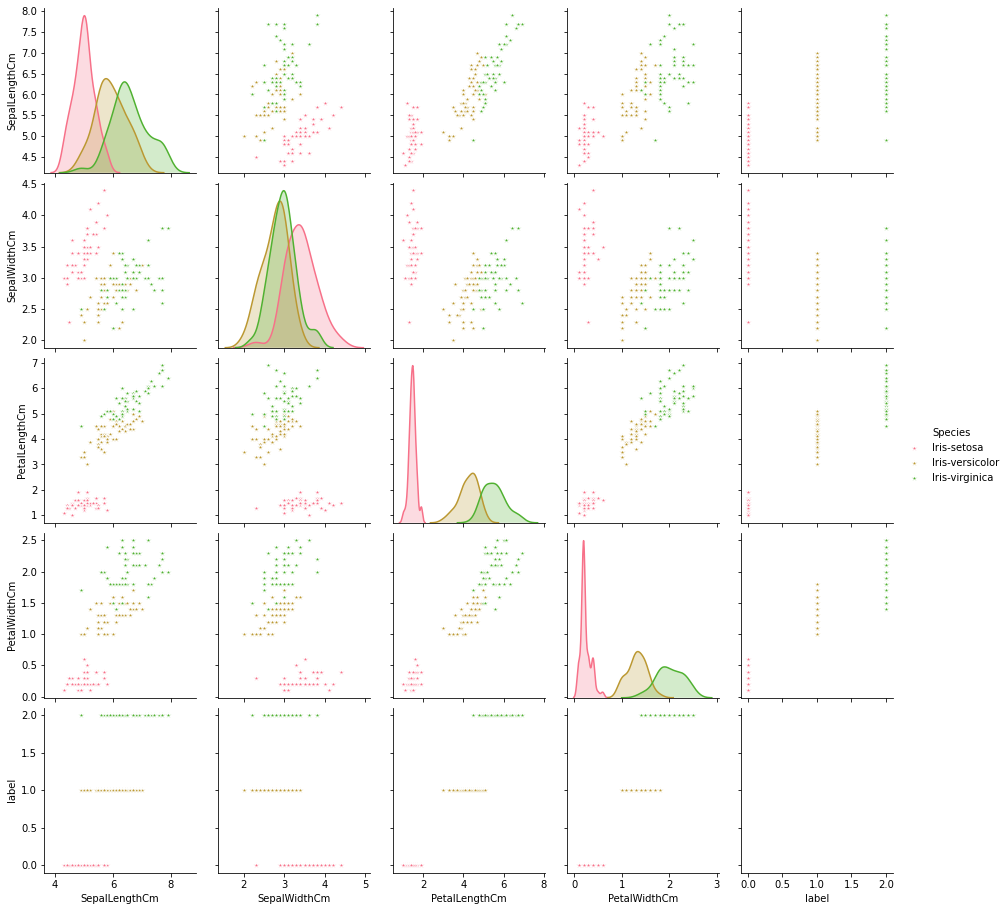

In [7]:
tmp = df.drop('Id', axis=1)
g = sns.pairplot(tmp, hue='Species', markers='*')
plt.show()

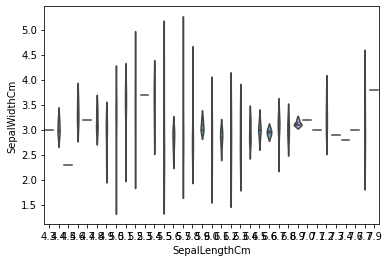

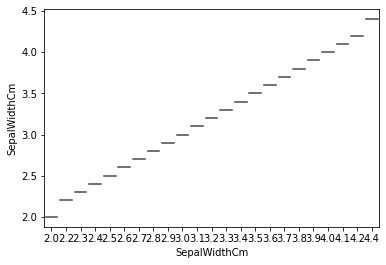

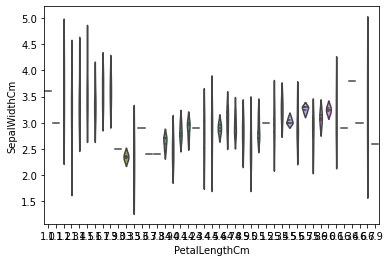

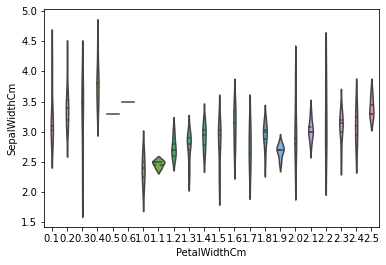

In [10]:
g = sns.violinplot(y='SepalWidthCm', x='SepalLengthCm', data=df, inner='quartile')
plt.show()
g = sns.violinplot(y='SepalWidthCm', x='SepalWidthCm', data=df, inner='quartile')
plt.show()
g = sns.violinplot(y='SepalWidthCm', x='PetalLengthCm', data=df, inner='quartile')
plt.show()
g = sns.violinplot(y='SepalWidthCm', x='PetalWidthCm', data=df, inner='quartile')
plt.show()

In [11]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [28]:
x=df.drop(columns=["Species","Id","label"])

In [29]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(x)

PCA(n_components=2)

In [30]:
pca_iris=pca.transform(x)

Text(0, 0.5, 'Iris Principal Component 2')

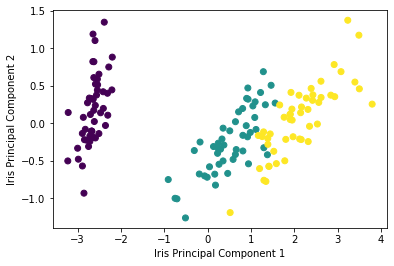

In [31]:
plt.scatter(pca_iris[:,0],pca_iris[:,1],c=df.label)
plt.xlabel("Iris Principal Component 1")
plt.ylabel("Iris Principal Component 2")

Modeling with scikit-learn

In [32]:
X = df.drop(['Id', 'Species','label'], axis=1)
y = df['Species']
# print(X.head())
print(X.shape)
# print(y.head())
print(y.shape)

(150, 4)
(150,)


Train and test on the same dataset
This method is not suggested since the end goal is to predict iris species using a dataset the model has not seen before.
There is also a risk of overfitting the training data.

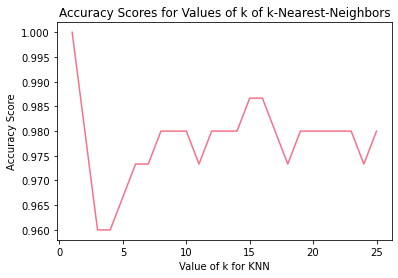

In [33]:
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)
    y_pred = knn.predict(X)
    scores.append(metrics.accuracy_score(y, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [18]:
print(scores)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9933333333333333, 1.0, 0.9933333333333333, 0.9933333333333333]


In [19]:
logreg = LogisticRegression()
logreg.fit(X, y)
y_pred = logreg.predict(X)
print(metrics.accuracy_score(y, y_pred))

1.0


C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Split the dataset into a training set and a testing set
Advantages
By splitting the dataset pseudo-randomly into a two separate sets, we can train using one set and test using another.
This ensures that we won't use the same observations in both sets.
More flexible and faster than creating a model using all of the dataset for training.
Disadvantages
The accuracy scores for the testing set can vary depending on what observations are in the set.
This disadvantage can be countered using k-fold cross-validation.
Notes
The accuracy score of the models depends on the observations in the testing set, which is determined by the seed of the pseudo-random number generator (random_state parameter).
As a model's complexity increases, the training accuracy (accuracy you get when you train and test the model on the same data) increases.
If a model is too complex or not complex enough, the testing accuracy is lower.
For KNN models, the value of k determines the level of complexity. A lower value of k means that the model is more complex.

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=5)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(90, 5)
(90,)
(60, 5)
(60,)


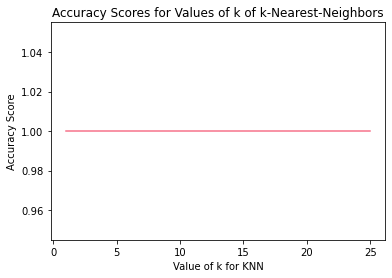

In [21]:
# experimenting with different n values
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [22]:
print(scores)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [23]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

1.0


C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Choosing KNN to Model Iris Species Prediction with k = 12
After seeing that a value of k = 12 is a pretty good number of neighbors for this model, I used it to fit the model for the entire dataset instead of just the training set.

In [34]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X, y)

# make a prediction for an example of an out-of-sample observation
knn.predict([[5.6, 2.3, 1.4, 2.2]])

array(['Iris-setosa'], dtype=object)